(chap:pandas_plot)=
# `Pandas`：図示

## 説明

In [1]:
import pandas as pd
import numpy as np
import japanize_matplotlib

```{margin}
<div name="html-admonition">
Do you want to read in a differnt language? Open the 
<input type="button" onclick="location.href='https://translate.google.com/translate?hl=&sl=ja&tl=en&u='+window.location;" value="Google translated version" style="color:#ffffff;background-color:#008080;" onmouseover="this.style.background='#99ccff'" onmouseout="this.style.background='#008080'"/>
in English or the language of your choice.
</div>
```

プロット用のパッケージ`Matplotlib`を紹介したが，実は`Pandas`の`DataFrame`と`Series`にはメソッド`plot()`が備えられており，それを使えば基本的なプロットをより簡単んコードで実現できる。裏で動いているのは`Matplotlib`であり，より複雑な図を作成する場合は、`Matplotlib`のコードを直接書くことが必要になるだろうが，手っ取り早くプロットしたい場合には重宝する手法である。詳細は[参考サイト（英語）](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)を参考にして欲しいが，ここでは基本的な使い方を紹介する。

次の`df0`を使って説明する。

In [2]:
dic = {'X':[10, 20, 30],
       'Y':[5.0, 30.0, 15.0],
       'Z':[3.0, 2.0, 5.0]}
df0 = pd.DataFrame(dic)
df0

,X,Y,Z
0,10,5.0,3.0
1,20,30.0,2.0
2,30,15.0,5.0


## プロット方法

プロット方法は簡単で，メソッド`.plot()`を使うと全ての列がプロットされる。

<AxesSubplot:>

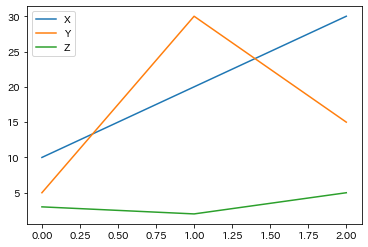

In [3]:
df0.plot()

* デフォルトでは横軸に行インデックスが使われ、`float`として扱われて表示されている。
* 凡例は自動的に表示され、列ラベルが使われる。
* 図の上に文字が表示されるが，表示したくない場合は最後に`;`を加えるか次の行に`pass`と書くと良いだろう。

次にある列だけをプロットしたい場合を考えよう。その場合は，プロットしたい列を抽出しメソッド`plot()`を使う。選択には`[]`を使い，その中に列ラベルをリストとして指定する。まず１つの列を選択する場合を考えよう。例えば，`X`を選択するとしよう。この場合、２つの方法がある。

* `X`を`Series`として抽出する場合
    ```
    df0['X']
    ```
* `X`を`DataFrame`として抽出する場合
    ```
    df0[['X']]
    ```
    ここでは`X`をリスト`['X']`として使っている。
    
列ラベルは文字列`X`で指定していることに留意しよう。

まず`X`の`Series`として抽出しよう。

In [4]:
df0['X']

0    10
1    20
2    30
Name: X, dtype: int64

次に`X`を`DataFrame`として抽出する。

In [5]:
df0[['X']]

,X
0,10
1,20
2,30


表示が少し異なることが確認できるが，メソッド`plot()`でも少しだけ違いがある。まず`X`を`Series`としてプロットしてみる。

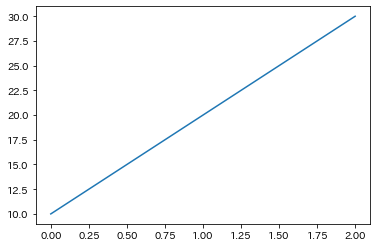

In [6]:
df0['X'].plot()
pass

`X`を`DataFrame`としてプロットすると凡例も表示される。

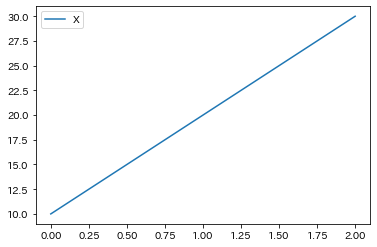

In [7]:
df0[['X']].plot()
pass

この場合の凡例は列ラベルがそのまま使われている。

次に`X`と`Z`をプロットしたいとしよう。２つの列を抽出するためには，以下のように列ラベルをリストとして書く。

In [8]:
df0[['X','Z']]

,X,Z
0,10,3.0
1,20,2.0
2,30,5.0


メソッド`plot()`を使いプロットする。

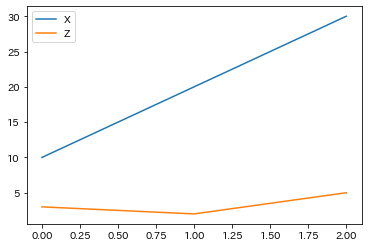

In [9]:
df0[['X','Z']].plot()
pass

もしくは`Series`を2行に分けても同じ図となるが，凡例は表示されない。

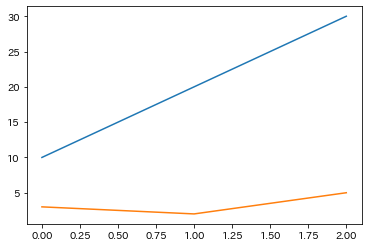

In [10]:
df0['X'].plot()
df0['Z'].plot()
pass

デフォルトでは横軸に行インデックが使われるが，横軸を指定したい場合は，次の引数を使う。
* `x`：横軸に使う列ラベル
* `y`：縦軸に使う列ラベル（複数の場合はリスト）

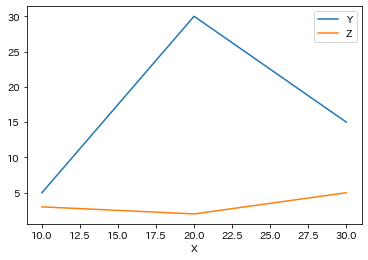

In [11]:
df0.plot(x='X',y=['Y','Z'])
pass

## 引数とメソッド

(sec:5-options)=
## 引数とメソッド

### 基本的な引数

`plot()`には様々な引数があり図に「飾り付け」をすることができる。詳しくは[このリンク](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)を参照することにして，ここでは基本的な引数だけを紹介する。
* `title`：図のタイトル（文字列型で指定）
* `style`：線のスタイル（リストにして列の順番で指定する;`-``--``-.``:`）
* `linewidth` or `lw`：線の幅
* `color`：色（リストにして列の順番で指定する; [参照サイト](https://matplotlib.org/3.1.0/gallery/color/named_colors.html)）
    * `r`は赤
    * `k`は黒
    * `g`はグリーン
* `marker`：観測値のマーカー（`o`，`.`，`>`，`^`などがある; [参照サイト](https://matplotlib.org/3.2.2/api/markers_api.html)）
* `markersize`：マーカーの大きさ
* `fontsize`：横軸・縦軸の数字のフォントサイズの設定
* `figsize`：図の大きさ
    * `figsize=(キャンバスの横幅、キャンバスの縦の長さ)`
* `legend`：凡例の表示を指定
    * `DataFrame`の場合はデフォルトは`True`
    * `Series`の場合はデフォルトは`False`
* `label`：凡例の表現を指定（`Series`のみ有効）
* `grid`：グリッド表示（ブール型;デフォルトは`False`)

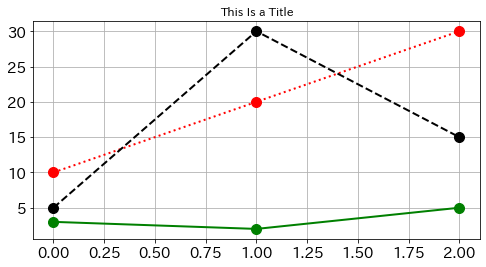

In [12]:
# df0はDataFrame

df0.plot(title='This Is a Title',
         style=[':','--','-'],
         linewidth=2,
         color=['r','k','g'],
         marker='o',
         markersize=10,
         fontsize=15,
         figsize=(8, 4),   # 8は横軸、4は縦軸のサイズ
         legend=False,
         grid=True,
        )
pass

### タイトルとラベルのサイズの調整

(sec:5-titlelabels)=
### タイトルとラベルのサイズの調整

タイトルのフォント・サイズの指定，横軸と縦軸のラベルとフォント・サイズの指定をおこなう場合は、`plot()`の引数ではなく下で説明する方法でおこなう。この方法を理解するために、`Python`は次の手順で描画していることをイメージして欲しい。ここで重要なのは「キャンバス」と「軸」の違いである。
1. 図を描くためのキャンバスを用意する。
    * `figure`や`fig`などの変数名があれば、キャンバスを指していると理解すれば良いだろう。
1. キャンバスのうえに実際に図を描く。
    * `ax`や`axes`などの変数名があれば、「図」を表していると理解すれば良いだろう。
    * ここでの「図」はキャンバスと異なるが混同しやすいので、以下では「図」の代わりに「軸」（英語で "axis"）という言葉を使うことにする。
    * キャンバスには複数の軸を描くことが可能である。

では実際に手順を説明する。
* 実は`df0.plot()`は「軸」を返す。それを変数（例えば，`ax`）に割り当てる。
* `ax`のメソッドを使って以下を設定する。
    * タイトル：`.set_title()`
        * `plot()`の中で引数`title`を使ってタイトルを設定することができるが，その場合はフォントの大きさを調整できない。一方，`.set_title()`を使うと調整が可能となる。
    * 横軸ラベル：`.set_xlabel()`    
    * 縦軸ラベル：`.set_ylabel()`

実際にそれらの引数を使ってプロットしてみよう。

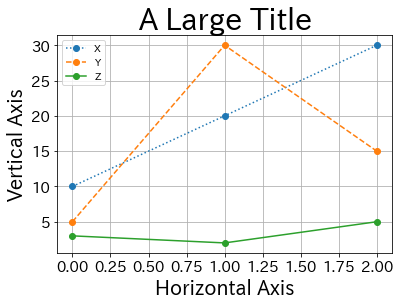

In [13]:
ax = df0.plot(grid=True                     # title=の引数は使わない
             ,style=[':','--','-']
             ,marker='o'
             ,fontsize=15
             )
ax.set_title('A Large Title', size= 30)     # タイトルの設定
ax.set_xlabel('Horizontal Axis', size=20)   # 横軸ラベルの設定
ax.set_ylabel('Vertical Axis', size=20)     # 縦軸ラベルの設定
pass

### 図を並べる

図を縦に並べるには`subplots=True`を指定する。

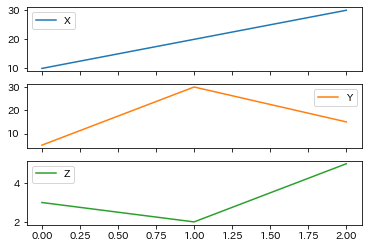

In [14]:
df0.plot(subplots=True)
pass

図を横に並べるには`layout=(1,3)`を付け加える。`layout`は図の配置を行列のように考えて指定し、`1`は行の数であり、`3`は列の数。
```
layout(行の数、列の数)
```

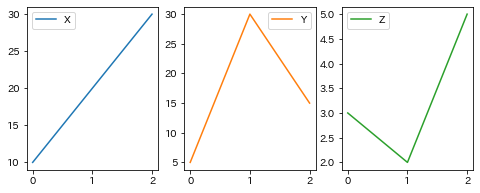

In [15]:
df0.plot(subplots=True, layout=(1,3), figsize=(8,3))
pass

### ２軸グラフ

左軸を`X`と`Y`に，右軸を`Z`に使うとしよう。その場合，引数`secondary_y`に`Z`を設定する。

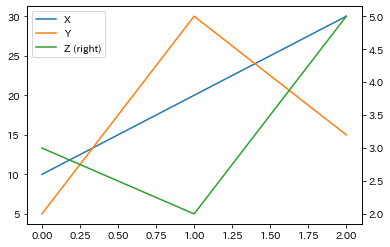

In [16]:
df0.plot(secondary_y='Z')
pass

別々の飾り付けをする場合は次のようにすると良いだろう。

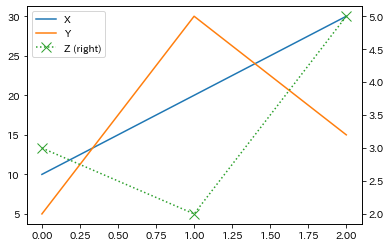

In [17]:
ax_ = df0[['X','Y']].plot()
df0[['Z']].plot(marker='x', markersize=10, linestyle=':',
                secondary_y=True, ax=ax_)
pass

上の図との主な違いが３行目にある
* `secondary_y=True`：`Z`を右軸に使うことを指定する。
* `ax=ax_`：「軸」`ax_`に`Z`をプロットする。

## 日本語

２つ方法を紹介するが、`japanize_matplotlib`を使う方法がより簡単であろう。

### `japanize_matplotlib`

使い方は到って簡単で、`Pandas`と同様にインポートするだけである。

In [18]:
import japanize_matplotlib

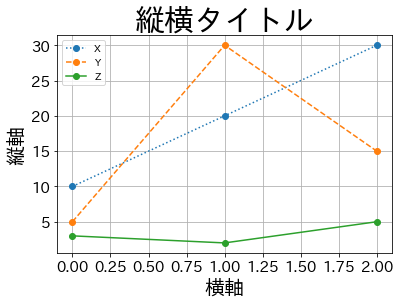

In [19]:
ax = df0.plot(grid=True
             ,style=[':','--','-']
             ,marker='o'
             ,fontsize=15
             )
ax.set_title('縦横タイトル', size= 30)
ax.set_xlabel('横軸', size=20)
ax.set_ylabel('縦軸', size=20)
pass

### フォントを指定する

2つの方法：
1. フォントはインストールせず、PC内にあるフォントを指定する。
1. フォントをインストールする方法

方法１の場合、以下で説明に使う変数`jfont`にフォントを指定する。
    * Macの場合、例えば`AppleGothic`
    * Windowsの場合、例えば`Yu Gothic`
    * この方法では一部の日本語が文字化けする場合がある。

方法２の場合：
* [このサイト](https://ipafont.ipa.go.jp/node193#jp)から次の内の１つをダウンロードする。
    * 2書体パック(IPAex明朝(Ver.xxx)、IPAexゴシック(Ver.xxx))
    * IPAex明朝 (Ver.xxx)
    * IPAexゴシック(Ver.xxx)
* [このサイト](https://ipafont.ipa.go.jp/node72#jp)に従ってインストールする。
* 次の両方もしくは１つがPCにインストールされる
    * IPAexMincho（IPAex明朝）
    * IPAexGothic（IPAexゴシック）

上の例を使い、設定方法の例を示す。

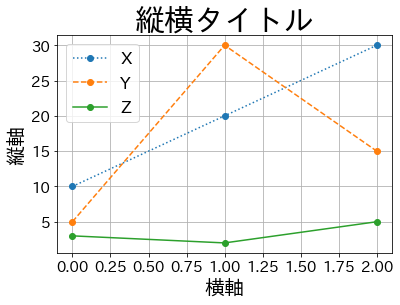

In [20]:
jfont = 'IPAexGothic'    # (1)

ax = df0.plot(grid=True
             ,style=[':','--','-']
             ,marker='o'
             ,fontsize=15
             )
ax.set_title('縦横タイトル', size= 30, fontname=jfont)   # (2)
ax.set_xlabel('横軸', size=20, fontname=jfont)          # (3)
ax.set_ylabel('縦軸', size=20, fontname=jfont)          # (4)
ax.legend(prop={'family':jfont, 'size':17})            # (5)
pass

>* (1) 使用するフォントを`jfont`に割り当てる。
>* (2) 引数`fontname`で`jfont`を指定する。タイトルのフォントが変更される。
>* (3) 引数`fontname`で`jfont`を指定する。横軸名のフォントが変更される。
>* (4) 引数`fontname`で`jfont`を指定する。縦軸名のフォントが変更される。
>* (5) `legend`は他と設定方法が異なる。
    * `prop`はフォントのプロパティを設定する引数であり、辞書で指定する。
    * キー`family`に値`jfont`を指定する。凡例のフォントが変更される。
    * キー`size`に数値を設定してフォントの大きさが変更される。

この例では個別にフォントを設定したが、一括で全てのフォントを変更する方法もあるが説明は割愛する。

## マクロ経済学の例

### 投資関数

実質利子率`r`によって投資がどのように変化するかを考えてみよう。まず投資関数を次のように仮定する。

In [21]:
def investment(y):
    return 100/(1+r)

* `100`：実質利子率が`0`の場合の投資

実質利子率は次のリストで与えられるとする。

In [22]:
r_list = list(range(0, 50))   # %表示の利子率 

In [23]:
i_list = []   # 空のリスト

for r in r_list:
    inv = investment(r)   # 投資の計算
    i_list.append(inv)    # リストに追加

df_inv = pd.DataFrame({'Investment':i_list})   # DataFrameの作成

最初の5行を表示する。

In [24]:
df_inv.head()

,Investment
0,100.000000
1,50.000000
2,33.333333
3,25.000000
4,20.000000


最後の5行を表示する。

In [25]:
df_inv.tail()

,Investment
45,2.173913
46,2.127660
47,2.083333
48,2.040816
49,2.000000


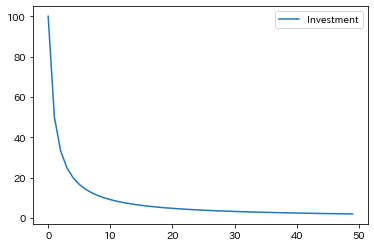

In [26]:
df_inv.plot()
pass

### 将来価値

`x`万円を実質年率`r`%の利息を得る金融商品に投資し，`t`年間の将来価値（期首の値）をリストで示す関数は以下で与えられた。

In [27]:
def calculate_futre_value(x, r, t):
    
    value_list = [x]           # 初期値が入ったリスト
    
    for year in range(1,t+1):  # 1からtまでの期間
        x = x*(1+r)            # 来期のxの値の計算
        value_list.append(x)   # リストに追加
    
    return value_list          # リストを返す

これを使い，
* `x`=`100`
* `t`=`30`

の下で実質利子率が次のリストで与えられる値を取る場合の将来価値を図示する。

In [28]:
r_list = [0.01, 0.03, 0.06]   # 実質利子率のリスト
dic = {}                      # 空の辞書

for r in r_list:
    dic['r='+str(r)] = calculate_futre_value(100, r, 30)  # 辞書に追加

df_future = pd.DataFrame(dic) # DataFrameの作成

`dic['r='+str(r)]`の説明：
* `str(r)`：`r_list`の要素のダミーである`r`は浮動小数点型なので関数`str()`を使って文字列型に変換する。
* `'r='+str(r)`：文字列型の`r=`と文字列型の`str(r)`を`+`で結合する。
* `dic['r='+str(r)]`：辞書`dic`にキー・値のペアを作成する。
    * キー：`'r='+str(r)`
    * 値：`calculate_futre_value(100, r, 30)`の返り値

最初の5行を表示する。

In [29]:
df_future.head()

,r=0.01,r=0.03,r=0.06
0,100.000000,100.000000,100.000000
1,101.000000,103.000000,106.000000
2,102.010000,106.090000,112.360000
3,103.030100,109.272700,119.101600
4,104.060401,112.550881,126.247696


最後の5行を表示する。

In [30]:
df_future.tail()

,r=0.01,r=0.03,r=0.06
26,129.525631,215.659127,454.938296
27,130.820888,222.128901,482.234594
28,132.129097,228.792768,511.168670
29,133.450388,235.656551,541.838790
30,134.784892,242.726247,574.349117


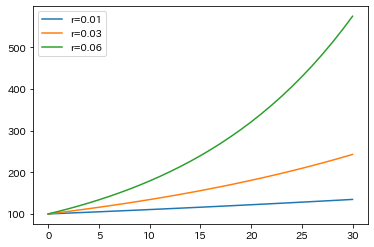

In [31]:
df_future.plot()
pass

## その他のプロット

### 種類

メソッド`.plot()`には様々な引数が用意されているが，その中に`kind`がある。次を文字列として指定すると様々な種類のプロットが可能となる。
* `line`：ライン・プロット
    * デフォルトの値であり，上で説明した直線・曲線のプロットとなる。
    * `.plot()`は`.plot.line()`と同じでもある。
    * [プロットの例](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.line.html)
* `bar`：縦向きの棒グラフ（カテゴリーなどの離散変数に使う）
    * `.plot(kind='bar')`は`.plot.bar()`と同じでもある。
    * [プロットの例](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html)
* `barh`：横向き棒グラフ（カテゴリーなどの離散変数に使う）
    * `barh`の`h`はHorizontalのH
    * `.plot(kind='hbar')`は`.plot.hbar()`と同じでもある。
    * [プロットの例](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.barh.html)
* `hist`：ヒストグラム（連続変数に使う）
    * `hist`はHISTogramのHIST
    * `.plot(kind='hist')`は`.plot.hist()`と同じでもある。
    * [プロットの例](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.hist.html)
* `box`：ボックスプロット
    * `.plot(kind='box')`は`.plot.box()`と同じでもある。
    * [プロットの例](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.box.html)
* `kde`：カーネル密度推定プロット
    * `kde`はKernel Density EstimateのKDE
    * `.plot(kind='kde')`は`.plot.kde()`と同じでもある。
    * [プロットの例](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.kde.html)
* `density`：`kde`と同じ
* `area`：エリア・プロット
    * `.plot(kind='area')`は`.plot.area()`と同じでもある。
    * [プロットの例](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.area.html)
* `pie`：パイチャート
    * `.plot(kind='pie')`は`.plot.pie()`と同じでもある。
    * [プロットの例](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html)
* `scatter`：散布図（`DataFrame`のみ）
    * `.plot(kind='scatter')`は`.plot.scatter()`と同じでもある。
    * [プロットの例](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html)
* `hexbin`： : 六角形プロット（`DataFrame`のみ）
    * `.plot(kind='hexbin')`は`.plot.hexbin()`と同じでもある。
    * [プロットの例](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.hexbin.html)

上で説明した[ライン・プロットの引数](sec:5-options)は他のプロットと共通のものが多いが，それぞれ独自の引数もある。

以下では散布図，ヒストグラム，カーネル密度推定プロットについて説明する。

説明には次のコードで生成する`DataFrame`を使う。列`X`と`Y`には標準正規分布から生成した100個のランダム変数が含まれている。`Z`には正規分布（平均`2`，標準偏差`1`）から抽出した100個のランダム変数が格納されている。

In [32]:
df1 = pd.DataFrame({'X':np.random.normal(size=100),
                    'Y':np.random.normal(size=100),
                    'Z':np.random.normal(loc=2, size=100)})

`X`，`Y`，`Z`は同じ標準正規分布から生成されているが，異なる値から構成されている。

### 散布図

散布図をプロットする場合は次の構文となる。
```
df1.plot(＜横軸の列ラベル＞, ＜縦軸の列ラベル＞, kind='scatter')
```
列`X`と`Y`を使ってプロットしてみよう。

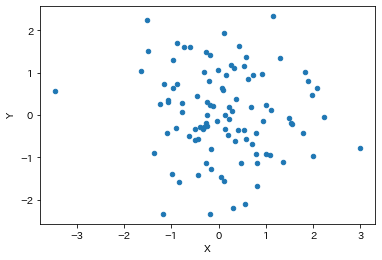

In [33]:
df1.plot('X', 'Y', kind='scatter')
pass

**＜基本的な引数＞**

様々な引数があり図に「飾り付け」をすることができる。詳しくは[このリンク](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html)を参照することにして，ここでは基本的な引数だけを紹介する。
* `title`：図のタイトル（文字列型で指定）
* `color`：色（リストにして列の順番で指定する; [参照サイト](https://matplotlib.org/3.1.0/gallery/color/named_colors.html)）
    * `r`は赤
    * `k`は黒
    * `g`はグリーン
* `marker`：観測値のマーカー（`o`，`.`，`>`，`^`などがある; [参照サイト](https://matplotlib.org/3.2.2/api/markers_api.html)）
* `s`：マーカーの大きさ（`markersize`ではない！）
* `fontsize`：横軸・縦軸の数字のフォントサイズの設定
* `figsize`：図の大きさ
    * `figsize=(キャンバスの横幅、キャンバスの縦の長さ)`
* `legend`：凡例の表示を指定
    * `DataFrame`の場合はデフォルトは`True`
    * `Series`の場合はデフォルトは`False`
* `label`：凡例の表現を指定（`Series`のみ有効）
* `grid`：グリッド表示（ブール型;デフォルトは`False`)

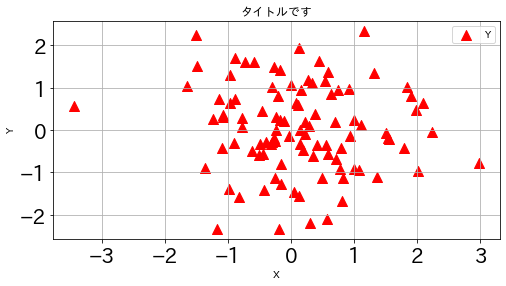

In [34]:
# df1はDataFrame

df1.plot('X', 'Y', kind='scatter',
         title='タイトルです',
         color='red',
         marker='^',
         s=100,
         fontsize=20,
         figsize=(8,4),
#          legend=True,
         label='Y',
         grid=True
        )
pass

この図ではタイトルと横軸・縦軸ラベルの大きさが調整できていないが，上で説明した[タイトルとラベルのサイズの調整](sec:5-titlelabels)のコードと共通なので，そちらを参照しよう。

またライン・プロットと同じように引数`ax`を使うことにより，複数の散布図を重ねてプロットできる。次のコードは`X`と`Y`，そして`X`と`Z`の散布図を同じ「軸」に表示している。

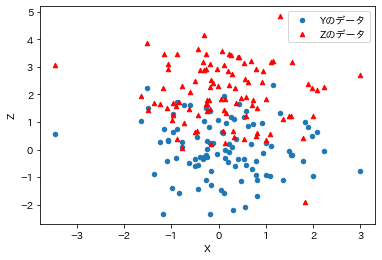

In [35]:
# df1はDataFrame

ax_ = df1.plot('X', 'Y', kind='scatter',label='Yのデータ')
df1.plot('X', 'Z', kind='scatter',
         color='red', marker='^', label='Zのデータ', ax=ax_)
pass

### ヒストグラム

ヒストグラムは次の構文となる。
```
df1.plot(kind='hist')
```
この場合，`df1`にある全ての列（整数型もしくは浮動小数点型）がヒストグラムとして重ねて表示される。特定の列だけを使う場合は次のように列を選択し`plot()`を使おう。

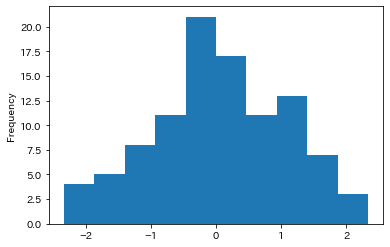

In [36]:
# df1['Y']はSeries

df1['Y'].plot(kind='hist')
pass

**＜基本的な引数＞**

様々な引数があり図に「飾り付け」をすることができる。詳しくは[このリンク](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.hist.html)を参照することにして，ここでは基本的な引数だけを紹介する。
* `title`：図のタイトル（文字列型で指定）
* `bins`：柱の数
* `color`：色（リストにして列の順番で指定する; [参照サイト](https://matplotlib.org/3.1.0/gallery/color/named_colors.html)）
    * `r`は赤
    * `k`は黒
    * `g`はグリーン
* `edgecolor`又は`ec`：柱の境界線の色
* `alpha`：透明度（`0`から`1.0`; デフォルトは`1`）
* `density`：縦軸を相対度数にする（デフォルトは`False`）
* `fontsize`：横軸・縦軸の数字のフォントサイズの設定
* `figsize`：図の大きさ
    * `figsize=(キャンバスの横幅、キャンバスの縦の長さ)`
* `legend`：凡例の表示を指定
    * `DataFrame`の場合はデフォルトは`True`
    * `Series`の場合はデフォルトは`False`
* `label`：凡例の表現を指定（`Series`のみ有効）
* `grid`：グリッド表示（ブール型;デフォルトは`False`)

引数を指定して`X`のヒストグラムをプロットしてみよう。

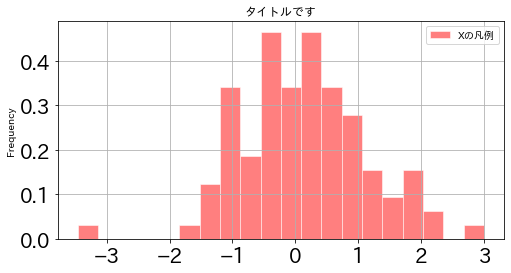

In [37]:
# XはSeriesとして抽出されている

df1['X'].plot(kind='hist',
         bins=20,
         title='タイトルです',
         color='red',
         ec='white',
         alpha=0.5,
         density=True,
         fontsize=20,
         figsize=(8,4),
         legend=True,
         label='Xの凡例',
         grid=True
        )
pass

この図ではタイトルと横軸・縦軸ラベルの大きさが調整できていないが，上で説明した[タイトルとラベルのサイズの調整](sec:5-titlelabels)のコードと共通なのでそちらを参照しよう。

次に複数のデータを重ねてプロットする場合を考えよう。ここで役に立つ引数が`alpha`である。

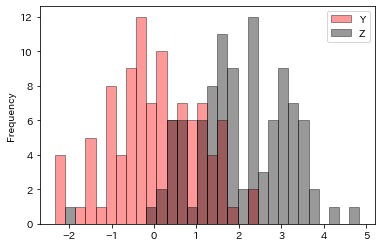

In [38]:
df1[['Y','Z']].plot(kind='hist',
                    bins=30,
                    color=['r','k'],
                    edgecolor='k',
                    alpha=0.4)
pass

濃い部分が重なっている部分となる。また柱を積み上げて表示するには`stacked=True`（デフォルトは`False`）を使う。

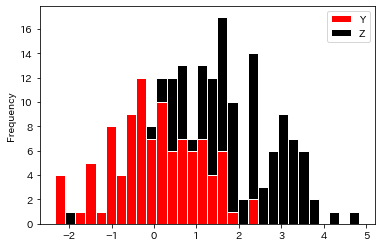

In [39]:
df1[['Y','Z']].plot(kind='hist', 
                    bins=30,
                    color=['r','k'],
                    edgecolor='white',
                    stacked=True)
pass

赤の上に黒が積み上げられている。

### カーネル密度推定プロット

ヒストグラムは縦軸に度数，横軸に階級を取ったグラフだが，関連する手法にカーネル密度推定と呼ばれるものがある。考え方は簡単で，上のようなヒストグラムのデータに基づき面積が１になるようにスムーズな分布を推計する手法である。ヒストグラムとカーネル密度関数を重ねてプロットすることもできる。

次の構文となる。
```
df1.plot(kind='kde')
```
この場合，`df1`にある全ての列がヒストグラムとして重ねて表示される。特定の列だけを使う場合は列を選択し`plot()`を使う。

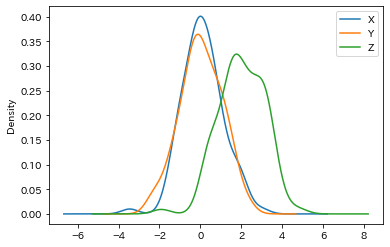

In [40]:
df1.plot(kind='kde')
pass

**＜基本的な引数＞**

様々な引数があり図に「飾り付け」をすることができる。詳しくは[このリンク](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.kde.html)を参照することにして，ここでは基本的な引数だけを紹介する。
* `title`：図のタイトル（文字列型で指定）
* `linestyle`又は`style`：線のスタイル（リストにして列の順番で指定する;`-``--``-.``:`）
* `linewidth` or `lw`：線の幅
* `color`：色（リストにして列の順番で指定する; [参照サイト](https://matplotlib.org/3.1.0/gallery/color/named_colors.html)）
    * `r`は赤
    * `k`は黒
    * `g`はグリーン
* `alpha`：透明度（`0`から`1.0`; デフォルトは`1`）
* `fontsize`：横軸・縦軸の数字のフォントサイズの設定
* `figsize`：図の大きさ
    * `figsize=(キャンバスの横幅、キャンバスの縦の長さ)`
* `legend`：凡例の表示を指定
    * `DataFrame`の場合はデフォルトは`True`
    * `Series`の場合はデフォルトは`False`
* `label`：凡例の表現を指定（`Series`のみ有効）
* `grid`：グリッド表示（ブール型;デフォルトは`False`)

引数を指定して`X`をプロットしてみる。

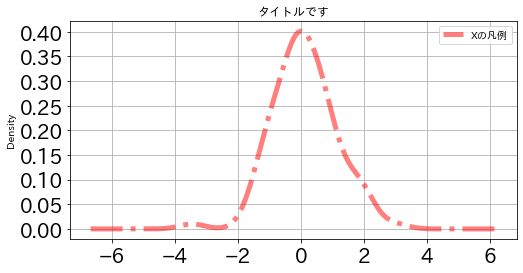

In [41]:
# XはSeriesとして抽出されている

df1['X'].plot(kind='kde',
         title='タイトルです',
         linewidth=5,
         linestyle='-.',
         color='red',
         alpha=0.5,
         fontsize=20,
         figsize=(8,4),
         legend=True,
         label='Xの凡例',
         grid=True
        )
pass

この図ではタイトルと横軸・縦軸ラベルの大きさが調整できていないが，上で説明した[タイトルとラベルのサイズの調整](sec:5-titlelabels)のコードと共通なのでそちらを参照しよう。

次にヒストグラムとカーネル密度推定プロットを重ねて図示してみる。ここで重要な点がヒストグラムに引数`density=True`を設定することである。これがないと縦軸の単位が異なり上手く表示できない。

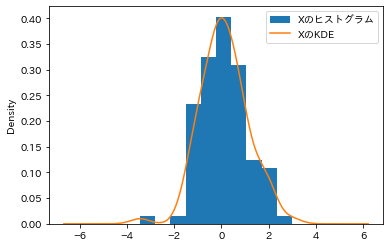

In [42]:
ax_ = df1['X'].plot(kind='hist',
                    density=True,
                    label='Xのヒストグラム',
                    legend=True)
df1['X'].plot(kind='kde',
              ax=ax_,
              label='XのKDE',
              legend=True)
pass

### 縦線・横線

図に縦線や横線を追加したい場合がある。その場合は，[タイトルとラベルのサイズの調整](sec:5-titlelabels)にあるように「軸」に追加していく事になる。次のような書き方となる。

* 縦線の場合
    ```
    ax_.axvline(＜横軸の値＞)
    ```
    ここで`axvline`の`ax`はAXis，`v`はVertical，`line`はLINEのことを表している。
* 横線の場合
    ```
    ax_.axhline(＜縦軸の値＞)
    ```
    ここで`axhline`の`ax`はAXis，`h`はHorizontal，`line`はLINEのことを表している。

ここで`ax_`は`.plot()`で返された「軸」のことである。

`Y`のヒストグラムを使ってプロットしてみよう。

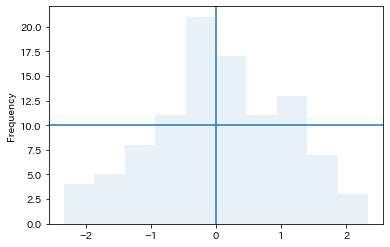

In [43]:
ax_ = df1['Y'].plot(kind='hist', alpha=0.1)
ax_.axvline(0)
ax_.axhline(10)
pass

**＜基本的な引数＞**

様々な引数があり図に「飾り付け」をすることができる。詳しくは[このリンク](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html)と[このリンク](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axhline.html)を参照することにして，ここでは基本的な引数だけを紹介する。
* `ymin`：`axvline`の縦軸における最小値（`0`~`1`の値; デフォルト`0`）
* `ymax`：`axvline`の縦軸における最大値（`0`~`1`の値; デフォルト`1`）
* `xmin`：`axhline`の横軸における最小値（`0`~`1`の値; デフォルト`0`）
* `xmax`：`axhline`の横軸における最大値（`0`~`1`の値; デフォルト`1`）
* `linestyle`：線のスタイル（リストにして列の順番で指定する;`-``--``-.``:`）
* `linewidth` or `lw`：線の幅
* `color`：色（リストにして列の順番で指定する; [参照サイト](https://matplotlib.org/3.1.0/gallery/color/named_colors.html)）
    * `r`は赤
    * `k`は黒
    * `g`はグリーン
* `alpha`：透明度（`0`から`1.0`; デフォルトは`1`）

引数を指定してプロットしてみる。

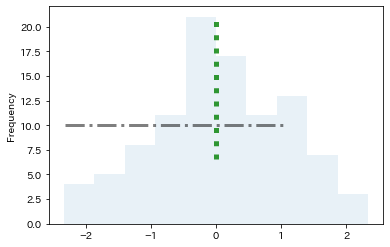

In [44]:
ax_ = df1['Y'].plot(kind='hist', alpha=0.1)
ax_.axvline(0,
            ymin=0.3,
            ymax=0.95,
            linestyle=':',
            linewidth=5,
            color='g',
            alpha=0.8)
ax_.axhline(10,
            xmin=0.05,
            xmax=0.7,
            linestyle='-.',
            linewidth=3,
            color='k',
            alpha=0.5)
pass

最後に上のヒストグラムとカーネル密度推定プロットに縦線を加えてみよう。

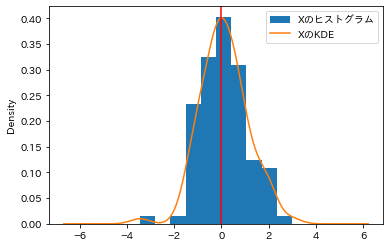

In [45]:
ax_ = df1['X'].plot(kind='hist',
                    density=True,
                    label='Xのヒストグラム',
                    legend=True)
df1['X'].plot(kind='kde',
              ax=ax_,
              label='XのKDE',
              legend=True)
ax_.axvline(0, color='red')
pass